In [1]:
import numpy as np
import matplotlib.pyplot as plt

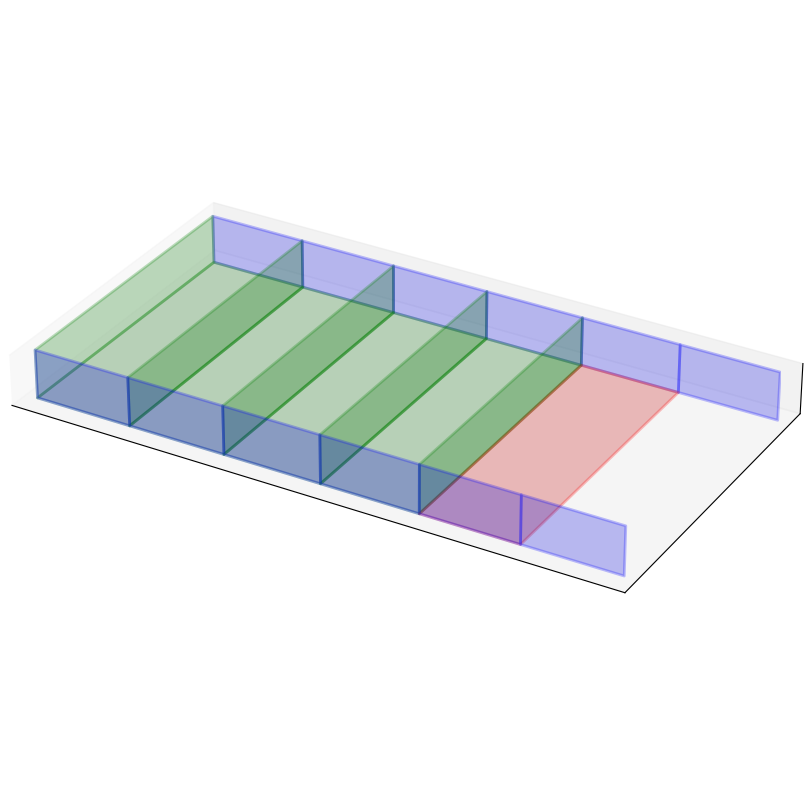

In [234]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

d_model = 8
d_hidden = 2*d_model
B = 48
L = 6

L_by_hidden_ax = 0
B_ax = 1
d_model_ax = 2

def plot_face(ax, vals1, vals2, depth, ax1, ax2, color='b'):
    ax3 = 3 - ax1 - ax2
    val1, val2 = np.meshgrid(vals1, vals2)
    val3 = np.full_like(val1, depth)
    arg = np.array([val1, val2, val3])[[ax1, ax2, ax3]]
    ax.plot_surface(*arg,
                    alpha=0.25, color=color, edgecolor=color, linewidth=2)


phase = 'bwd'
phase_l = 4.5
for l in range(L+1):
    if l <= phase_l:
        c = 'g'
        if phase == 'bwd' and l == phase_l:
            c = 'r'
        plot_face(ax, (0, d_model), (0, B), l*d_hidden, d_model_ax, B_ax, color=c)
    if l == L:
        break
    if l + 0.5 <= phase_l:
        c = 'g'
        if phase == 'bwd' and l + 0.5 == phase_l:
            c = 'r'
        plot_face(ax, (l*d_hidden, (l+1)*d_hidden), (0, B), 0, L_by_hidden_ax, B_ax, color=c)
    plot_face(ax, (l*d_hidden, (l+1)*d_hidden), (0, d_model), 0, L_by_hidden_ax, d_model_ax)
    plot_face(ax, (l*d_hidden, (l+1)*d_hidden), (0, d_model), B, L_by_hidden_ax, d_model_ax)

width = L*d_hidden
ax.set_xlim3d(0, width)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()
